<h1 style="color:blue";> U.S. Natural Gas and Gas Condensate Production Well Counts</h1>
<h3 style="color:blue";>1989 to 2020</h3>
<br>
<p>
    Data is retrieved from <a href=https://www.eia.gov/dnav/ng/ng_prod_wells_s1_a.htm>eia.gov</a> <br>
    
</p>

In [123]:
# Import libaries used in notebook
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', False)

In [124]:
# Read in data from flat file (csv) downloaded from noted site
data_file = "..\\data\\NG_PROD_WELLS_1989_to_2020.csv"
df = pd.read_csv(data_file)

In [ ]:
# Clean up column names and data
cols = []
for c in df.columns:
    c = c.replace(" Natural Gas Number of Gas and Gas Condensate Wells (Count)","")
    c = c.replace(" Number of Gas and Gas Condensate Wells of Natural Gas (Number of Elements)","")
    cols.append(c)
df.columns = cols
df.fillna(0, inplace=True)
df[df.columns[0:]] = df[df.columns[0:]].apply(lambda x: x.astype(int) )

# Copy just in case
data = df.copy()

<h4>Line graphcs for each state's well count</h4>
<p>Let us graph each state's well counts over the years to see any interesting changes</p>

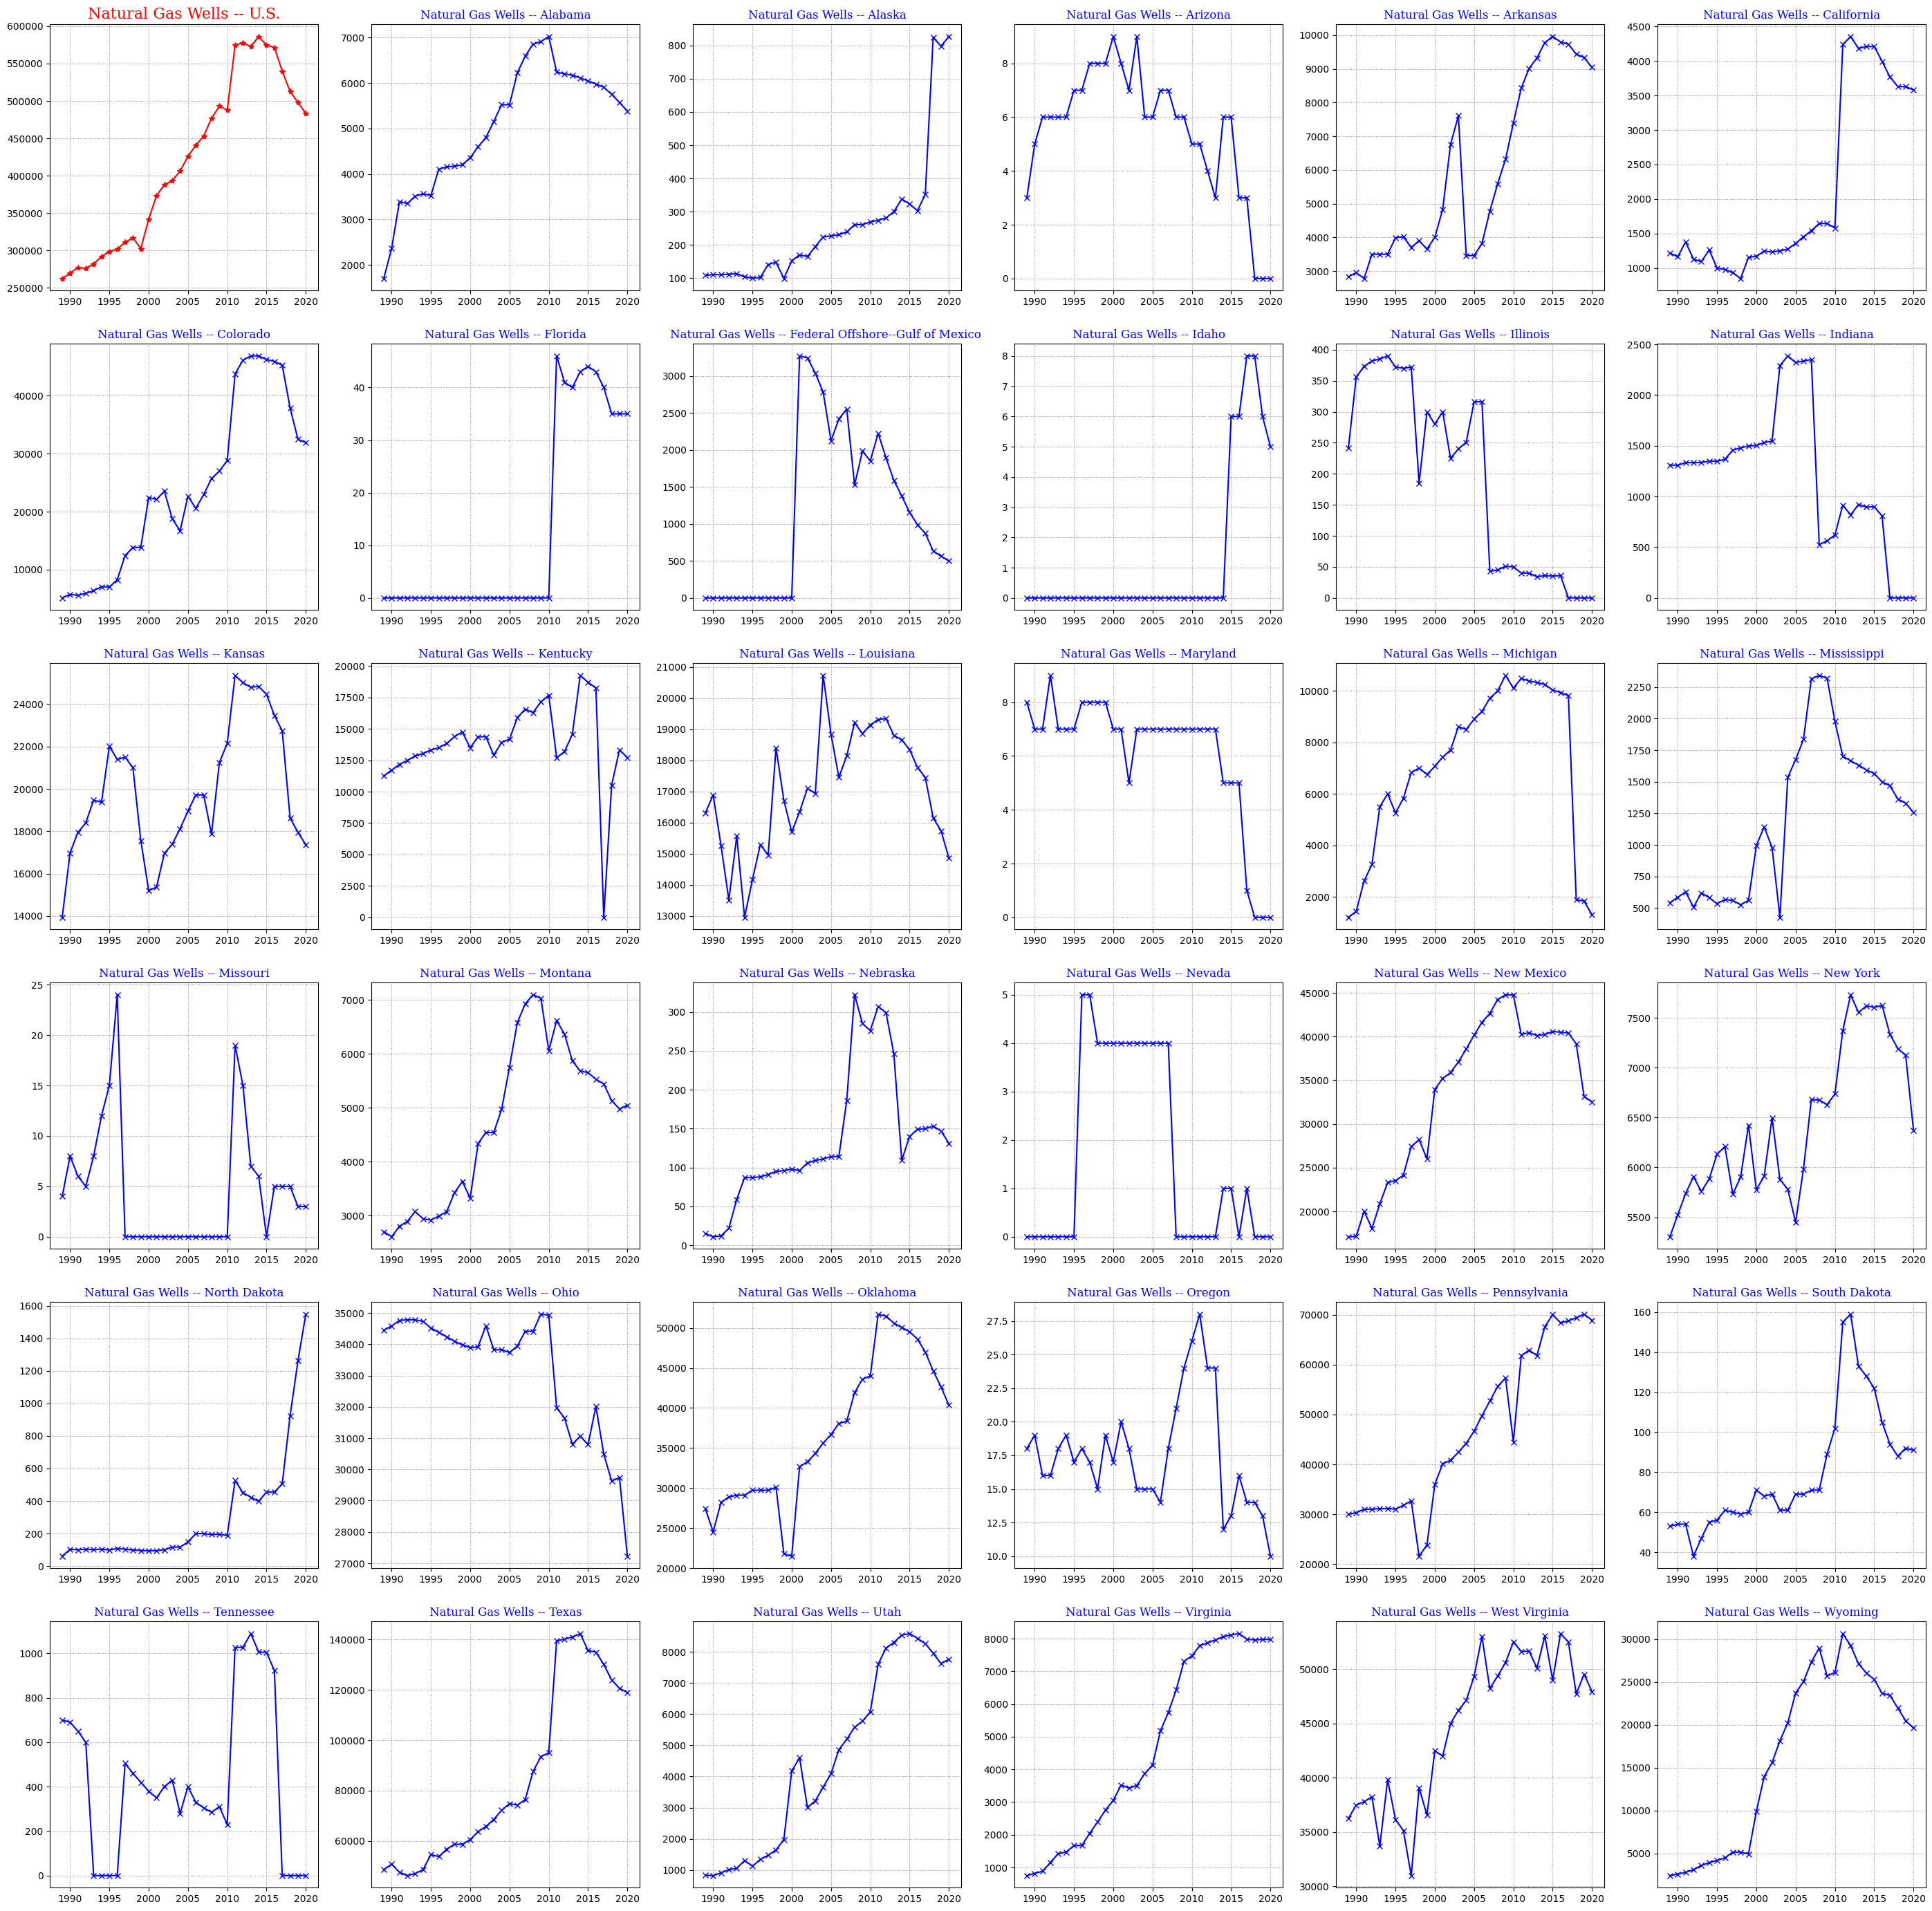

In [147]:
x = df['Date'].copy()
label_font = {'family':'serif', 'color': 'darkgray', 'size': 10}
title_font = {'family' : 'serif', 'color' : 'blue', 'size' : 12}

i_x = 0  # column-wise, or along x-axis
i_y = 0  # row-wise, or along y-axis
fig, ax = plt.subplots(6, 6, figsize=(35,35))

for c in df.columns[1:]:
    y = df[c].copy()
    if c == 'U.S.':
        ax[i_y, i_x].plot(x, y, color='red', marker='*', linewidth=1.5)
        ax[i_y, i_x].set_title(f"Natural Gas Wells -- {c}", fontdict = {'family' : 'serif', 'color' : 'red', 'size' : 16})
        ax[i_y, i_x].grid(color='gray', linestyle = ':', linewidth=0.65)
    else:
        ax[i_y, i_x].plot(x, y, color='blue', marker='x')
        ax[i_y, i_x].set_title(f"Natural Gas Wells -- {c}", fontdict = title_font)
        ax[i_y, i_x].grid(color='gray', linestyle = ':', linewidth=0.65)
    if i_x < 5:
        i_x+=1
    else:
        i_x = 0
        i_y+=1
plt.show()

In [121]:
for c in df.columns[2:]:
    df[c] = df[c] / df['U.S.'] * 100
    df[c] = df[c].apply(lambda x: np.round(x, 3))
df['U.S.'] = df['U.S.'] / df['U.S.'] * 100
df['U.S.'] = df['U.S.'].apply(lambda x: np.round(x, 2))

In [122]:
df['Check'] = df[df.columns[2:]].sum(axis=1)
print(df.head(40))
df.drop(columns=['Check'], inplace=True)

    Date   U.S.  Alabama  Alaska  Arizona  Arkansas  ...   Texas   Utah  Virginia  West Virginia  Wyoming    Check
0   1989  100.0    0.648   0.041    0.001     1.078  ...  18.519  0.318     0.286         13.807    0.926  100.002
1   1990  100.0    0.875   0.041    0.002     1.094  ...  18.854  0.305     0.304         13.900    0.964  100.002
2   1991  100.0    1.225   0.040    0.002     1.004  ...  17.190  0.330     0.320         13.647    1.018  100.001
3   1992  100.0    1.214   0.041    0.002     1.268  ...  16.774  0.364     0.418         13.858    1.127  100.000
4   1993  100.0    1.245   0.040    0.002     1.240  ...  16.693  0.376     0.505         11.950    1.281   99.996
5   1994  100.0    1.222   0.036    0.002     1.200  ...  16.675  0.447     0.504         13.651    1.351  100.002
6   1995  100.0    1.181   0.033    0.002     1.336  ...  18.301  0.378     0.560         12.107    1.406  100.000
7   1996  100.0    1.360   0.034    0.002     1.332  ...  17.831  0.444     0.55